In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import io
from PIL import Image
import folium
from folium import plugins
import json
from google.colab import drive
from tqdm import tqdm
import scipy.stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 8.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.9 MB/s 
     |████████████████████████████████| 15.4 MB 36.5 MB/s 


([], <a list of 0 Text major ticklabel objects>)

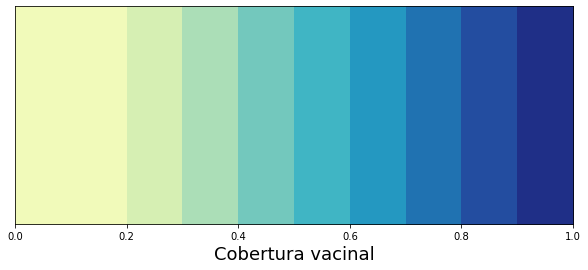

In [18]:
plt.figure(figsize=(10,4))
plt.fill_between([0,0.2], 0, 1, color = sns.color_palette('YlGnBu', 9)[0])
plt.fill_between([0.2,0.3], 0, 1, color = sns.color_palette('YlGnBu', 9)[1])
plt.fill_between([0.3,0.4], 0, 1, color = sns.color_palette('YlGnBu', 9)[2])
plt.fill_between([0.4,0.5], 0, 1, color = sns.color_palette('YlGnBu', 9)[3])
plt.fill_between([0.5,0.6], 0, 1, color = sns.color_palette('YlGnBu', 9)[4])
plt.fill_between([0.6,0.7], 0, 1, color = sns.color_palette('YlGnBu', 9)[5])
plt.fill_between([0.7,0.8], 0, 1, color = sns.color_palette('YlGnBu', 9)[6])
plt.fill_between([0.8,0.9], 0, 1, color = sns.color_palette('YlGnBu', 9)[7])
plt.fill_between([0.9,1], 0, 1, color = sns.color_palette('YlGnBu', 9)[8])
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('Cobertura vacinal', fontsize = 18)
plt.yticks([])

In [3]:
date = '2021-12-06'
date_new = date.replace('-','')

In [4]:
df = pd.read_csv('https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/cobertura_vacinal_brasil_por_municipio.csv')

In [5]:
if df.columns[0] == '[Município]':
  df = df.rename(columns={'[Município]': 'Município'})

In [6]:
states = ['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA',
          'PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
names = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará', 'Distrito Federal',
         'Espirito Santo', 'Goiás', 'Maranhão', 'Minas Gerias', 'Mato Grosso do Sul',
         'Mato Grosso', 'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
         'Rio Grande do Norte', 'Rôndonia', 'Roraima', 'Rio Grande do Sul', 'Santa Catarina',
         'Sergipe', 'São Paulo', 'Tocantins']
stds = []
normality = []
norm_p = []
iqrs = []
cis = []

In [7]:
df.head(5)

,Município,Cód. IBGE,UF,Região,Fabricante,Total de doses aplicadas,1ª Dose D1,2ª Dose D2,Dose Adicional DA,Dose Reforço DR,Dose Única DU
0,Abadia De Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,6.766,3.793,2.970,1.0,2,0.0
1,Abadia De Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,7.296,3.792,3.502,0.0,2,0.0
2,Abadia De Goiás,520005,GO,Centro-Oeste,JANSSEN,166,0,0,0.0,0,166.0
3,Abadia De Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,7.552,4.574,2.252,16.0,710,0.0
4,Abadia Dos Dourados,310010,MG,Sudeste,BUTANTAN/SINOVAC,2.670,1.384,1.285,0.0,1,0.0


# Homogeneidade

In [8]:
for j in tqdm(range(len(states))):
  state = states[j]
  pe = df.loc[df['UF'] == state].reset_index(drop=True)
  pe = pe.drop([len(pe)-1])
  pe_pops = pd.read_csv(f'gdrive/MyDrive/Brasil/Populacao_municipios/{state}_info.csv')
  for i in range(len(pe)):
    municip = ''
    if pe['Município'][i] == 'Abreu E Lima':
      municip += 'Abreu e Lima'
      pe['Município'][i] = municip
    elif 'Tabocão' in pe['Município'][i] and state == 'TO':
      municip += 'Tabocão'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Passa E Fica':
      municip += 'Passa e Fica'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Biritiba-Mirim':
      municip += 'Biritiba Mirim'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Embu':
      municip += 'Embu das Artes'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Amparo De São Francisco':
      municip += 'Amparo do São Francisco'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Grão Pará':
      municip += 'Grão-Pará'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Augusto Severo':
      municip += 'Campo Grande'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Restinga Seca':
      municip += 'Restinga Sêca'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Vespasiano Correa':
      municip += 'Vespasiano Corrêa'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Xangri-Lá':
      municip += 'Xangri-lá'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Westfalia':
      municip += 'Westfália'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Sant'Ana Do Livramento":
      municip += "Sant'Ana do Livramento"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Não-Me-Toque':
      municip += 'Não-Me-Toque'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho-D'Água Do Borges":
      municip += "Olho d'Água do Borges"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Diamante D'Oeste":
      municip += "Diamante D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Rancho Alegre D'Oeste":
      municip += "Rancho Alegre D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Barra D'Alcântara":
      municip += "Barra D'Alcântara"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho D'Água Do Piauí":
      municip += "Olho D'Água do Piauí"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Pau D'Arco Do Piauí":
      municip += "Pau D'Arco do Piauí"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Pedro Ii':
      municip += 'Pedro II'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Pio Ix':
      municip += 'Pio IX'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Pontes E Lacerda':
      municip += 'Pontes e Lacerda'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Pau D'Arco":
      municip += "Pau D'Arco"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Conquista D'Oeste":
      municip += "Conquista D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Figueirópolis D'Oeste":
      municip += "Figueirópolis D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Glória D'Oeste":
      municip += "Glória D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Lambari D'Oeste":
      municip += "Lambari D'Oeste"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Amparo Da Serra':
      municip += 'Amparo do Serra'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Dona Euzebia':
      municip += 'Dona Euzébia'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olhos-D'Água":
      municip += "Olhos-d'Água"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Guarda-Mor':
      municip += 'Guarda-Mor'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Passa-Vinte':
      municip += 'Passa Vinte'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'São João Del Rei':
      municip += 'São João del Rei'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Pingo-D'Água":
      municip += "Pingo-d'Água"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "São Thomé Das Letras":
      municip += "São Tomé das Letras"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Sapucaí-Mirim":
      municip += "Sapucaí-Mirim"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Sem-Peixe":
      municip += "Sem-Peixe"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Apicum-Açu':
      municip += 'Apicum-Açu'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Conceição Do Lago-Açu':
      municip += 'Conceição do Lago-Açu'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho D'Água Das Cunhãs":
      municip += "Olho d'Água das Cunhãs"
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Pindaré-Mirim':
      municip += 'Pindaré-Mirim'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Pio Xii':
      municip += 'Pio XII'
      pe['Município'][i] = municip
    elif pe['Município'][i] == 'Varre-Sai':
      municip += 'Varre-Sai'
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho D'Água Das Flores":
      municip += "Olho d'Água das Flores"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho D'Água Do Casado":
      municip += "Olho d'Água do Casado"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Olho D'Água Grande":
      municip += "Olho d'Água Grande"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Tanque D'Arca":
      municip += "Tanque d'Arca"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Dias D'Ávila":
      municip += "Dias d'Ávila"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Xique-Xique":
      municip += "Xique-Xique"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Ererê":
      municip += "Ereré"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Itapagé":
      municip += "Itapajé"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Atilio Vivacqua":
      municip += "Atílio Vivácqua"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "São João D'Aliança":
      municip += "São João d'Aliança"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Sítio D'Abadia":
      municip += "Sítio d'Abadia"
      pe['Município'][i] = municip
    elif pe['Município'][i] == "Seridó":
      municip += "São Vicente do Seridó"
      pe['Município'][i] = municip
    elif "D'" in pe['Município'][i] and state != 'RO':
      slices = pe['Município'][i].split(' ')
      for k in range(len(slices)):
        if "D'" in slices[k]:
          if k != len(slices)-1:
            subslices = slices[k].split("'")
            municip += "d'" + subslices[1] + ' '
          else:
            subslices = slices[k].split("'")
            municip += "d'" + subslices[1]
        elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
            name = slices[k].lower()
            municip += name + ' '
        else:
          if k != len(slices)-1:
            municip += slices[k] + ' '
          else:
            municip += slices[k]
      pe['Município'][i] = municip
    elif "D'" in pe['Município'][i] and state == 'RO':
      slices = pe['Município'][i].split(' ')
      for k in range(len(slices)):
        if "D'" in slices[k]:
          if k != len(slices)-1:
            subslices = slices[k].split("'")
            municip += "D'" + subslices[1] + ' '
          else:
            subslices = slices[k].split("'")
            municip += "D'" + subslices[1]
        elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
            name = slices[k].lower()
            municip += name + ' '
        else:
          if k != len(slices)-1:
            municip += slices[k] + ' '
          else:
            municip += slices[k]
      pe['Município'][i] = municip
    elif '-' in pe['Município'][i]:
      slices = pe['Município'][i].split(' ')
      for k in range(len(slices)):
        if "-" in slices[k]:
          if k != len(slices)-1:
            subslices = slices[k].split("-")
            municip += subslices[0][0] + subslices[0][1:].lower() + '-' + subslices[1][0] + subslices[1][1:].lower() + ' '
          else:
            subslices = slices[k].split("-")
            municip += subslices[0][0] + subslices[0][1:].lower() + '-' + subslices[1][0] + subslices[1][1:].lower()
        elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
            name = slices[k].lower()
            municip += name + ' '
        else:
          if k != len(slices)-1:
            municip += slices[k] + ' '
          else:
            municip += slices[k]
      pe['Município'][i] = municip
    else:
      n = pe['Município'][i].split(' ')
      for j in range(len(n)):
        if j < len(n)-1:
          if n[j] == 'De' or n[j] == 'Do' or n[j] == 'Da' or n[j] == 'Dos' or n[j] == 'Das' or n[j] == 'Del' or n[j] == 'No' or n[j] == 'Na':
            name = n[j].lower()
            municip += name + ' '
          else:
            name = n[j][1:].lower()
            municip += n[j][0] + name + ' '
        else:
          name = n[j][1:].lower()
          municip += n[j][0] + name
    pe['Município'][i] = municip
  
  pops = []

  for i in range(len(pe)):
    pops.append(pe_pops.loc[pe_pops['Município [-]'] == pe['Município'][i]]['População estimada - pessoas [2021]'].values[0])

  pe['Populacao'] = pops

  for i in range(len(pe['2ª Dose D2'])):
    try:
      if len(pe['2ª Dose D2'][i].split('.')) == 2:
        pe['2ª Dose D2'][i] = int(pe['2ª Dose D2'][i].split('.')[0]+pe['2ª Dose D2'][i].split('.')[1])
      elif len(pe['2ª Dose D2'][i].split('.')) == 3:
        pe['2ª Dose D2'][i] = int(pe['2ª Dose D2'][i].split('.')[0]+pe['2ª Dose D2'][i].split('.')[1]+pe['2ª Dose D2'][i].split('.')[2])
    except:
      pass
    
    if str(pe['Dose Única DU'][i]).split('.')[1] == '000' or str(pe['Dose Única DU'][i]).split('.')[1] == '0':
      pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0])
    elif len(str(pe['Dose Única DU'][i]).split('.')[1]) > 8:
      pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0]+str(pe['Dose Única DU'][i]).split('.')[1][:3])
    elif '9999999' in str(pe['Dose Única DU'][i]).split('.')[1]:
      pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0]+str(pe['Dose Única DU'][i]).split('.')[1][:3])
    else:
      pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0]+str(pe['Dose Única DU'][i]).split('.')[1])

  pe['2ª Dose D2'] = pe['2ª Dose D2'].astype('float')

  pe_final = {}
  muns = []
  doses = []

  for i in range(len(pe_pops)):
    muns.append(pe_pops['Município [-]'][i])
    pe_doses = pe.loc[pe['Município'] == pe_pops['Município [-]'][i]]
    try:
      doses.append(np.sum(pe_doses['2ª Dose D2'].values)+pe_doses.loc[pe_doses['Fabricante'] == 'JANSSEN']['Dose Única DU'].values[0])
    except:
      doses.append(np.sum(pe_doses['2ª Dose D2'].values))

  pe_final['Municipio'] = muns
  pe_final['Imunização completa'] = np.array(doses)
  pe_final['Populacao'] = pe_pops['População estimada - pessoas [2021]']
  pe_final['Cobertura vacinal'] = 100*pe_final['Imunização completa']/pe_final['Populacao']
  pe_final['Cobertura vacinal norm'] = pe_final['Imunização completa']/pe_final['Populacao']

  for i in range(len(pe_final['Cobertura vacinal norm'])):
    if pe_final['Cobertura vacinal'][i] > 100:
      pe_final['Cobertura vacinal'][i] = 100
    if pe_final['Cobertura vacinal norm'][i] > 1:
      pe_final['Cobertura vacinal norm'][i] = 1

  pe_final = pd.DataFrame(pe_final)

  # fig = plt.figure(figsize=(12,6))
  # n,x,_ = plt.hist(pe_final['Cobertura vacinal norm'], bins=np.linspace(0,1,41), color = 'lightseagreen', edgecolor='black',
  #                 alpha = 0.6)
  # bin_centers = 0.5*(x[1:]+x[:-1])
  # plt.plot(bin_centers,n, color = 'crimson', linestyle='dashed')
  # plt.xlabel('Fração completamente imunizada', fontsize = 14)
  # plt.ylabel('Quantidade de municipios', fontsize = 14)
  # plt.xlim(0,1)
  # fig.patch.set_alpha(1)
  # for ax in fig.axes:
  #     ax.patch.set_alpha(1)
  # plt.savefig(f'Distribution_coverages_{state}.png', dpi = 300, bbox_inches = 'tight')
  # plt.close()

  if state == 'MG' or state == 'SC' or state == 'TO':
    !unzip 'gdrive/MyDrive/Brasil/Malha_municipal/{state}_Municipios_2020.zip'
  else:
    !wget 'https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/{state}_Municipios_2020.zip'
  !unzip '{state}_Municipios_2020.zip'
  if state == 'SP':
    shp_file = gpd.read_file(f'SP_Municipios_2020/{state}_Municipios_2020.shp')
  else:
    shp_file = gpd.read_file(f'{state}_Municipios_2020.shp')
  shp_file.to_file(f'{state}_Municipios_2020.geojson',
                  driver='GeoJSON')
  pe_mun = f'{state}_Municipios_2020.geojson'
  geo_json_data = json.load(open(pe_mun))

  map = folium.Map(width='100%', height='100%', location = [-15.8420, -47.9428], zoom_start = 6)

  map.choropleth(geo_data = geo_json_data, name = 'Cobertura vacinal completa', data = pe_final, columns = ['Municipio', 'Cobertura vacinal norm'],
               key_on = 'feature.properties.NM_MUN', fill_color = 'YlGnBu', fill_opacity = 0.9, line_color = 'black',
               line_opacity = 0.6,
               show = False,
               legend_name = f'Cobertura vacinal completa ({date})',
               bins = [0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
  
  map.save(f'gdrive/MyDrive/COVID/Vaccination/Maps/vaccine_{state}_2_dose.html')

  stds.append(np.var(pe_final['Cobertura vacinal']))
  iqrs.append(st.iqr(pe_final['Cobertura vacinal'], rng = (25,75)))
  if state != 'DF':
    cis.append(st.iqr(pe_final['Cobertura vacinal'], rng = (2.5,97.5)))
    normality.append(st.shapiro(pe_final['Cobertura vacinal'])[0])
    norm_p.append(st.shapiro(pe_final['Cobertura vacinal'])[1])
  else:
    cis.append(st.iqr(pe_final['Cobertura vacinal'], rng = (2.5,97.5)))
    normality.append(np.nan)
    norm_p.append(np.nan)

  0%|          | 0/27 [00:00<?, ?it/s]

--2021-12-08 13:36:38--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/AC_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AC_Municipios_2020.zip [following]
--2021-12-08 13:36:39--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AC_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1683179 (1.6M) [application/zip]
Saving to: ‘AC_Municipios_2020.zip’

AC_Municipios_2020. 100%[===================>]   1.60M  --.-KB/s 

  4%|▎         | 1/27 [00:04<02:02,  4.70s/it]

--2021-12-08 13:36:43--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/AL_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AL_Municipios_2020.zip [following]
--2021-12-08 13:36:44--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AL_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1751724 (1.7M) [application/zip]
Saving to: ‘AL_Municipios_2020.zip’

AL_Municipios_2020. 100%[===================>]   1.67M  --.-KB/s 

  7%|▋         | 2/27 [00:09<01:53,  4.55s/it]

--2021-12-08 13:36:47--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/AM_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AM_Municipios_2020.zip [following]
--2021-12-08 13:36:48--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AM_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8953561 (8.5M) [application/zip]
Saving to: ‘AM_Municipios_2020.zip’

AM_Municipios_2020. 100%[===================>]   8.54M  --.-KB/s 

 11%|█         | 3/27 [00:21<03:16,  8.18s/it]

--2021-12-08 13:36:59--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/AP_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AP_Municipios_2020.zip [following]
--2021-12-08 13:37:00--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/AP_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979992 (957K) [application/zip]
Saving to: ‘AP_Municipios_2020.zip’

AP_Municipios_2020. 100%[===================>] 957.02K  --.-KB/s  

 15%|█▍        | 4/27 [00:24<02:18,  6.02s/it]

--2021-12-08 13:37:05--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/BA_Municipios_2020.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/BA_Municipios_2020.zip [following]
--2021-12-08 13:37:05--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/BA_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13724619 (13M) [application/zip]
Saving to: ‘BA_Municipios_2020.zip’

BA_Municipios_2020. 100%[===================>]  13.09M  --.-K

 19%|█▊        | 5/27 [00:46<04:17, 11.68s/it]

--2021-12-08 13:37:25--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/CE_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/CE_Municipios_2020.zip [following]
--2021-12-08 13:37:26--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/CE_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3427861 (3.3M) [application/zip]
Saving to: ‘CE_Municipios_2020.zip’

CE_Municipios_2020. 100%[===================>]   3.27M  --.-KB/s 

 22%|██▏       | 6/27 [00:52<03:30, 10.01s/it]

--2021-12-08 13:37:30--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/DF_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/DF_Municipios_2020.zip [following]
--2021-12-08 13:37:31--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/DF_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121575 (119K) [application/zip]
Saving to: ‘DF_Municipios_2020.zip’

DF_Municipios_2020. 100%[===================>] 118.73K  --.-KB/s  

 26%|██▌       | 7/27 [00:54<02:23,  7.18s/it]

--2021-12-08 13:37:32--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/ES_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/ES_Municipios_2020.zip [following]
--2021-12-08 13:37:33--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/ES_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3428115 (3.3M) [application/zip]
Saving to: ‘ES_Municipios_2020.zip’

ES_Municipios_2020. 100%[===================>]   3.27M  --.-KB/s 

 30%|██▉       | 8/27 [01:01<02:14,  7.09s/it]

--2021-12-08 13:37:40--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/GO_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/GO_Municipios_2020.zip [following]
--2021-12-08 13:37:41--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/GO_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5112674 (4.9M) [application/zip]
Saving to: ‘GO_Municipios_2020.zip’

GO_Municipios_2020. 100%[===================>]   4.88M  --.-KB/s 

 33%|███▎      | 9/27 [01:10<02:20,  7.81s/it]

--2021-12-08 13:37:50--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/MA_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MA_Municipios_2020.zip [following]
--2021-12-08 13:37:50--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MA_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5954229 (5.7M) [application/zip]
Saving to: ‘MA_Municipios_2020.zip’

MA_Municipios_2020. 100%[===================>]   5.68M  --.-KB/s 

 37%|███▋      | 10/27 [01:20<02:23,  8.45s/it]

Archive:  gdrive/MyDrive/Brasil/Malha_municipal/MG_Municipios_2020.zip
  inflating: MG_Municipios_2020.cpg  
  inflating: MG_Municipios_2020.dbf  
  inflating: MG_Municipios_2020.prj  
  inflating: MG_Municipios_2020.shp  
  inflating: MG_Municipios_2020.shx  
unzip:  cannot find or open MG_Municipios_2020.zip, MG_Municipios_2020.zip.zip or MG_Municipios_2020.zip.ZIP.


 41%|████      | 11/27 [02:11<05:43, 21.46s/it]

--2021-12-08 13:38:50--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/MS_Municipios_2020.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MS_Municipios_2020.zip [following]
--2021-12-08 13:38:52--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MS_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9020794 (8.6M) [application/zip]
Saving to: ‘MS_Municipios_2020.zip’

MS_Municipios_2020. 100%[===================>]   8.60M  --.-K

 44%|████▍     | 12/27 [02:26<04:55, 19.69s/it]

--2021-12-08 13:39:06--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/MT_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MT_Municipios_2020.zip [following]
--2021-12-08 13:39:06--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/MT_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8832666 (8.4M) [application/zip]
Saving to: ‘MT_Municipios_2020.zip’

MT_Municipios_2020. 100%[===================>]   8.42M  --.-KB/s 

 48%|████▊     | 13/27 [02:41<04:12, 18.06s/it]

--2021-12-08 13:39:20--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/PA_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PA_Municipios_2020.zip [following]
--2021-12-08 13:39:20--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PA_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2393908 (2.3M) [application/zip]
Saving to: ‘PA_Municipios_2020.zip’

PA_Municipios_2020. 100%[===================>]   2.28M  --.-KB/s 

 52%|█████▏    | 14/27 [02:46<03:03, 14.10s/it]

--2021-12-08 13:39:25--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/PB_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PB_Municipios_2020.zip [following]
--2021-12-08 13:39:26--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PB_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2810296 (2.7M) [application/zip]
Saving to: ‘PB_Municipios_2020.zip’

PB_Municipios_2020. 100%[===================>]   2.68M  --.-KB/s 

 56%|█████▌    | 15/27 [02:53<02:23, 11.95s/it]

--2021-12-08 13:39:32--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/PE_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PE_Municipios_2020.zip [following]
--2021-12-08 13:39:33--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PE_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1434410 (1.4M) [application/zip]
Saving to: ‘PE_Municipios_2020.zip’

PE_Municipios_2020. 100%[===================>]   1.37M  --.-KB/s 

 59%|█████▉    | 16/27 [02:57<01:47,  9.74s/it]

--2021-12-08 13:39:37--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/PI_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PI_Municipios_2020.zip [following]
--2021-12-08 13:39:38--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PI_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1855599 (1.8M) [application/zip]
Saving to: ‘PI_Municipios_2020.zip’

PI_Municipios_2020. 100%[===================>]   1.77M  --.-KB/s 

 63%|██████▎   | 17/27 [03:03<01:24,  8.44s/it]

--2021-12-08 13:39:44--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/PR_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PR_Municipios_2020.zip [following]
--2021-12-08 13:39:44--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/PR_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025163 (3.8M) [application/zip]
Saving to: ‘PR_Municipios_2020.zip’

PR_Municipios_2020. 100%[===================>]   3.84M  --.-KB/s 

 67%|██████▋   | 18/27 [03:12<01:18,  8.76s/it]

--2021-12-08 13:39:51--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip [following]
--2021-12-08 13:39:52--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RJ_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5305814 (5.1M) [application/zip]
Saving to: ‘RJ_Municipios_2020.zip’

RJ_Municipios_2020. 100%[===================>]   5.06M  --.-KB/s 

 70%|███████   | 19/27 [03:21<01:11,  8.89s/it]

--2021-12-08 13:40:01--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RN_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RN_Municipios_2020.zip [following]
--2021-12-08 13:40:01--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RN_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397822 (388K) [application/zip]
Saving to: ‘RN_Municipios_2020.zip’

RN_Municipios_2020. 100%[===================>] 388.50K  --.-KB/s  

 74%|███████▍  | 20/27 [03:24<00:49,  7.10s/it]

--2021-12-08 13:40:03--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RO_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RO_Municipios_2020.zip [following]
--2021-12-08 13:40:03--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RO_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 749115 (732K) [application/zip]
Saving to: ‘RO_Municipios_2020.zip’

RO_Municipios_2020. 100%[===================>] 731.56K  --.-KB/s  

 78%|███████▊  | 21/27 [03:27<00:35,  5.90s/it]

--2021-12-08 13:40:06--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RR_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RR_Municipios_2020.zip [following]
--2021-12-08 13:40:06--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RR_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 559361 (546K) [application/zip]
Saving to: ‘RR_Municipios_2020.zip’

RR_Municipios_2020. 100%[===================>] 546.25K  --.-KB/s  

 81%|████████▏ | 22/27 [03:30<00:24,  4.83s/it]

--2021-12-08 13:40:11--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/RS_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RS_Municipios_2020.zip [following]
--2021-12-08 13:40:12--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/RS_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7258238 (6.9M) [application/zip]
Saving to: ‘RS_Municipios_2020.zip’

RS_Municipios_2020. 100%[===================>]   6.92M  --.-KB/s 

 85%|████████▌ | 23/27 [03:44<00:30,  7.58s/it]

Archive:  gdrive/MyDrive/Brasil/Malha_municipal/SC_Municipios_2020.zip
  inflating: SC_Municipios_2020.cpg  
  inflating: SC_Municipios_2020.dbf  
  inflating: SC_Municipios_2020.prj  
  inflating: SC_Municipios_2020.shp  
  inflating: SC_Municipios_2020.shx  
unzip:  cannot find or open SC_Municipios_2020.zip, SC_Municipios_2020.zip.zip or SC_Municipios_2020.zip.ZIP.


 89%|████████▉ | 24/27 [04:27<00:54, 18.32s/it]

--2021-12-08 13:41:06--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/SE_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SE_Municipios_2020.zip [following]
--2021-12-08 13:41:06--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SE_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1472917 (1.4M) [application/zip]
Saving to: ‘SE_Municipios_2020.zip’

SE_Municipios_2020. 100%[===================>]   1.40M  --.-KB/s 

 93%|█████████▎| 25/27 [04:32<00:28, 14.21s/it]

--2021-12-08 13:41:15--  https://github.com/PedroHPCintra/COVID_Brasil/raw/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip [following]
--2021-12-08 13:41:15--  https://raw.githubusercontent.com/PedroHPCintra/COVID_Brasil/main/Cobertura_municipios_SP%26RJ/SP_Municipios_2020.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18734553 (18M) [application/zip]
Saving to: ‘SP_Municipios_2020.zip’

SP_Municipios_2020. 100%[===================>]  17.87M  --.-KB/s 

 96%|█████████▋| 26/27 [04:52<00:15, 15.96s/it]

Archive:  gdrive/MyDrive/Brasil/Malha_municipal/TO_Municipios_2020.zip
  inflating: TO_Municipios_2020.cpg  
  inflating: TO_Municipios_2020.dbf  
  inflating: TO_Municipios_2020.prj  
  inflating: TO_Municipios_2020.shp  
  inflating: TO_Municipios_2020.shx  
unzip:  cannot find or open TO_Municipios_2020.zip, TO_Municipios_2020.zip.zip or TO_Municipios_2020.zip.ZIP.


100%|██████████| 27/27 [05:29<00:00, 12.19s/it]


In [316]:
br_final = {}

br_final['Estados'] = names
br_final['Siglas'] = states
br_final['Variância'] = stds
br_final['SD'] = np.sqrt(np.array(stds))
br_final['Normality'] = normality
br_final['p-value'] = norm_p
br_final['IQR'] = iqrs
br_final['CIs'] = np.array(cis)/100
br_final['Homogeneidade'] = 1 - np.array(cis)/100

In [317]:
br_final = pd.DataFrame(br_final)

In [318]:
br_final

,Estados,Siglas,Variância,SD,Normality,p-value,IQR,CIs,Homogeneidade
0,Acre,AC,57.913895,7.610118,0.972117,7.595492e-01,7.611131,0.295607,0.704393
1,Alagoas,AL,108.386014,10.410860,0.953194,1.187423e-03,11.930849,0.384426,0.615574
2,Amazonas,AM,197.927183,14.068660,0.907929,2.042738e-04,19.982139,0.443657,0.556343
3,Amapá,AP,51.972045,7.209164,0.959366,6.502919e-01,11.643861,0.229462,0.770538
4,Bahia,BA,218.073944,14.767327,0.984374,1.803682e-04,17.188526,0.588723,0.411277
5,Ceará,CE,262.570915,16.204040,0.990596,2.709921e-01,21.205536,0.612149,0.387851
6,Distrito Federal,DF,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000
7,Espirito Santo,ES,94.908946,9.742122,0.979478,2.406576e-01,15.145979,0.363281,0.636719
8,Goiás,GO,222.384150,14.912550,0.988131,4.010724e-02,19.081646,0.626600,0.373400
9,Maranhão,MA,124.200849,11.144543,0.990629,1.739836e-01,16.031208,0.410808,0.589192


In [319]:
st.spearmanr(br_final['SD'], br_final['CIs'])

SpearmanrResult(correlation=0.9322344322344323, pvalue=1.5490704889513185e-12)

In [320]:
max(br_final['Homogeneidade'])

1.0

In [321]:
!unzip 'gdrive/MyDrive/Brasil/Malha_municipal/BR_UF_2020.zip'

Archive:  gdrive/MyDrive/Brasil/Malha_municipal/BR_UF_2020.zip
  inflating: BR_UF_2020.cpg          
  inflating: BR_UF_2020.dbf          
  inflating: BR_UF_2020.prj          
  inflating: BR_UF_2020.shp          
  inflating: BR_UF_2020.shx          


In [322]:
shp_file = gpd.read_file('BR_UF_2020.shp')

In [323]:
shp_file.to_file('BR_UF_2020.geojson',
                 driver='GeoJSON')

In [324]:
br_states = 'BR_UF_2020.geojson'

In [325]:
geo_json_data = json.load(open(br_states))

In [326]:
geo_json_data['features'][0]['properties']

{'CD_UF': '11', 'NM_REGIAO': 'Norte', 'NM_UF': 'Rondônia', 'SIGLA_UF': 'RO'}

In [327]:
map = folium.Map(width='100%', height='100%', location = [-15.8420, -47.9428], zoom_start = 5)

In [328]:
map.choropleth(geo_data = geo_json_data, name = 'Homogeneidade na cobertura vacinal', data = br_final,
               columns = ['Siglas', 'Homogeneidade'],
               key_on = 'feature.properties.SIGLA_UF', fill_color = 'RdYlBu', fill_opacity = 0.9, line_color = 'black',
               line_opacity = 0.6,
               show = False,
               legend_name = f'Homogeneidade na cobertura vacinal ({date})',
               bins = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [329]:
map.save('br_homogeneity.html')

# Mapa mesorregiões

In [14]:
idx = -1
for state in tqdm(states):
  idx += 1
  state_pops = pd.read_csv(f'gdrive/MyDrive/Brasil/Populacao_municipios/{state}_info.csv')
  if idx == 0:
    state_pops = pd.read_csv(f'gdrive/MyDrive/Brasil/Populacao_municipios/{state}_info.csv')
    pe_pops = state_pops
  else:
    pe_pops = pd.concat([pe_pops, state_pops]).reset_index(drop=True)

100%|██████████| 27/27 [00:07<00:00,  3.39it/s]


In [292]:
pe = df.reset_index(drop=True)
pe = pe.drop([len(pe)-1])
for i in range(len(pe)):
  municip = ''
  if pe['Município'][i] == 'Abreu E Lima':
    municip += 'Abreu e Lima'
    pe['Município'][i] = municip
  elif 'Tabocão' in pe['Município'][i] and state == 'TO':
    municip += 'Tabocão'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Alta Floresta D'Oeste":
    municip += "Alta Floresta D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Alvorada D'Oeste":
    municip += "Alvorada D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Espigão D'Oeste":
    municip += "Espigão D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Machadinho D'Oeste":
    municip += "Machadinho D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Nova Brasilândia D'Oeste":
    municip += "Nova Brasilândia D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Santa Luzia D'Oeste":
    municip += "Santa Luzia D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "São Felipe D'Oeste":
    municip += "São Felipe D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Passa E Fica':
    municip += 'Passa e Fica'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Biritiba-Mirim':
    municip += 'Biritiba Mirim'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Embu':
    municip += 'Embu das Artes'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Amparo De São Francisco':
    municip += 'Amparo do São Francisco'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Grão Pará':
    municip += 'Grão-Pará'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Augusto Severo':
    municip += 'Campo Grande'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Restinga Seca':
    municip += 'Restinga Sêca'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Vespasiano Correa':
    municip += 'Vespasiano Corrêa'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Xangri-Lá':
    municip += 'Xangri-lá'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Westfalia':
    municip += 'Westfália'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Sant'Ana Do Livramento":
    municip += "Sant'Ana do Livramento"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Não-Me-Toque':
    municip += 'Não-Me-Toque'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho-D'Água Do Borges":
    municip += "Olho d'Água do Borges"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Diamante D'Oeste":
    municip += "Diamante D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Rancho Alegre D'Oeste":
    municip += "Rancho Alegre D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Barra D'Alcântara":
    municip += "Barra D'Alcântara"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho D'Água Do Piauí":
    municip += "Olho D'Água do Piauí"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Pau D'Arco Do Piauí":
    municip += "Pau D'Arco do Piauí"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Pedro Ii':
    municip += 'Pedro II'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Pio Ix':
    municip += 'Pio IX'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Pontes E Lacerda':
    municip += 'Pontes e Lacerda'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Pau D'Arco":
    municip += "Pau D'Arco"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Conquista D'Oeste":
    municip += "Conquista D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Figueirópolis D'Oeste":
    municip += "Figueirópolis D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Glória D'Oeste":
    municip += "Glória D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Lambari D'Oeste":
    municip += "Lambari D'Oeste"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Amparo Da Serra':
    municip += 'Amparo do Serra'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Dona Euzebia':
    municip += 'Dona Euzébia'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olhos-D'Água":
    municip += "Olhos-d'Água"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Guarda-Mor':
    municip += 'Guarda-Mor'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Passa-Vinte':
    municip += 'Passa Vinte'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'São João Del Rei':
    municip += 'São João del Rei'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Pingo-D'Água":
    municip += "Pingo-d'Água"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "São Thomé Das Letras":
    municip += "São Tomé das Letras"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Sapucaí-Mirim":
    municip += "Sapucaí-Mirim"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Sem-Peixe":
    municip += "Sem-Peixe"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Apicum-Açu':
    municip += 'Apicum-Açu'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Conceição Do Lago-Açu':
    municip += 'Conceição do Lago-Açu'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho D'Água Das Cunhãs":
    municip += "Olho d'Água das Cunhãs"
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Pindaré-Mirim':
    municip += 'Pindaré-Mirim'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Pio Xii':
    municip += 'Pio XII'
    pe['Município'][i] = municip
  elif pe['Município'][i] == 'Varre-Sai':
    municip += 'Varre-Sai'
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho D'Água Das Flores":
    municip += "Olho d'Água das Flores"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho D'Água Do Casado":
    municip += "Olho d'Água do Casado"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Olho D'Água Grande":
    municip += "Olho d'Água Grande"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Tanque D'Arca":
    municip += "Tanque d'Arca"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Dias D'Ávila":
    municip += "Dias d'Ávila"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Xique-Xique":
    municip += "Xique-Xique"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Ererê":
    municip += "Ereré"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Itapagé":
    municip += "Itapajé"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Atilio Vivacqua":
    municip += "Atílio Vivácqua"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "São João D'Aliança":
    municip += "São João d'Aliança"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Sítio D'Abadia":
    municip += "Sítio d'Abadia"
    pe['Município'][i] = municip
  elif pe['Município'][i] == "Seridó":
    municip += "São Vicente do Seridó"
    pe['Município'][i] = municip
  elif "D'" in pe['Município'][i] and state != 'RO':
    slices = pe['Município'][i].split(' ')
    for k in range(len(slices)):
      if "D'" in slices[k]:
        if k != len(slices)-1:
          subslices = slices[k].split("'")
          municip += "d'" + subslices[1] + ' '
        else:
          subslices = slices[k].split("'")
          municip += "d'" + subslices[1]
      elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
          name = slices[k].lower()
          municip += name + ' '
      else:
        if k != len(slices)-1:
          municip += slices[k] + ' '
        else:
          municip += slices[k]
    pe['Município'][i] = municip
  elif "D'" in pe['Município'][i] and state == 'RO':
    slices = pe['Município'][i].split(' ')
    for k in range(len(slices)):
      if "D'" in slices[k]:
        if k != len(slices)-1:
          subslices = slices[k].split("'")
          municip += "D'" + subslices[1] + ' '
        else:
          subslices = slices[k].split("'")
          municip += "D'" + subslices[1]
      elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
          name = slices[k].lower()
          municip += name + ' '
      else:
        if k != len(slices)-1:
          municip += slices[k] + ' '
        else:
          municip += slices[k]
    pe['Município'][i] = municip
  elif '-' in pe['Município'][i]:
    slices = pe['Município'][i].split(' ')
    for k in range(len(slices)):
      if "-" in slices[k]:
        if k != len(slices)-1:
          subslices = slices[k].split("-")
          municip += subslices[0][0] + subslices[0][1:].lower() + '-' + subslices[1][0] + subslices[1][1:].lower() + ' '
        else:
          subslices = slices[k].split("-")
          municip += subslices[0][0] + subslices[0][1:].lower() + '-' + subslices[1][0] + subslices[1][1:].lower()
      elif slices[k] == 'De' or slices[k] == 'Do' or slices[k] == 'Da' or slices[k] == 'Dos' or slices[k] == 'Das' or slices[k] == 'Del':
          name = slices[k].lower()
          municip += name + ' '
      else:
        if k != len(slices)-1:
          municip += slices[k] + ' '
        else:
          municip += slices[k]
    pe['Município'][i] = municip
  else:
    n = pe['Município'][i].split(' ')
    for j in range(len(n)):
      if j < len(n)-1:
        if n[j] == 'De' or n[j] == 'Do' or n[j] == 'Da' or n[j] == 'Dos' or n[j] == 'Das' or n[j] == 'Del' or n[j] == 'No' or n[j] == 'Na':
          name = n[j].lower()
          municip += name + ' '
        else:
          name = n[j][1:].lower()
          municip += n[j][0] + name + ' '
      else:
        name = n[j][1:].lower()
        municip += n[j][0] + name
  pe['Município'][i] = municip

In [293]:
pops = []

for i in range(len(pe)):
  try:
    pops.append(pe_pops.loc[pe_pops['Município [-]'] == pe['Município'][i]]['População estimada - pessoas [2021]'].values[0])
  except:
    print(i, pe['Município'][i])

pe['Populacao'] = pops

In [294]:
pe

,Município,Cód. IBGE,UF,Região,Fabricante,Total de doses aplicadas,1ª Dose D1,2ª Dose D2,Dose Adicional DA,Dose Reforço DR,Dose Única DU,Populacao
0,Abadia de Goiás,520005,GO,Centro-Oeste,BUTANTAN/SINOVAC,6.766,3.793,2.970,1.0,2,0.0,9158
1,Abadia de Goiás,520005,GO,Centro-Oeste,FIOCRUZ/ASTRAZENECA,7.296,3.792,3.502,0.0,2,0.0,9158
2,Abadia de Goiás,520005,GO,Centro-Oeste,JANSSEN,166,0,0,0.0,0,166.0,9158
3,Abadia de Goiás,520005,GO,Centro-Oeste,PFIZER/BIONTECH,7.552,4.574,2.252,16.0,710,0.0,9158
4,Abadia dos Dourados,310010,MG,Sudeste,BUTANTAN/SINOVAC,2.670,1.384,1.285,0.0,1,0.0,7022
...,...,...,...,...,...,...,...,...,...,...,...,...
22274,Zé Doca,211400,MA,Nordeste,JANSSEN,455,0,0,0.0,9,446.0,52190
22275,Zé Doca,211400,MA,Nordeste,PFIZER/BIONTECH,22.315,13.136,7.336,55.0,1.788,0.0,52190
22276,Zortéa,421985,SC,Sul,BUTANTAN/SINOVAC,1.835,945,890,0.0,0,0.0,3432
22277,Zortéa,421985,SC,Sul,FIOCRUZ/ASTRAZENECA,2.040,1.038,1.002,0.0,0,0.0,3432


In [296]:
for i in range(len(pe['2ª Dose D2'])):
  try:
    if len(pe['2ª Dose D2'][i].split('.')) == 2:
      pe['2ª Dose D2'][i] = int(pe['2ª Dose D2'][i].split('.')[0]+pe['2ª Dose D2'][i].split('.')[1])
    elif len(pe['2ª Dose D2'][i].split('.')) == 3:
      pe['2ª Dose D2'][i] = int(pe['2ª Dose D2'][i].split('.')[0]+pe['2ª Dose D2'][i].split('.')[1]+pe['2ª Dose D2'][i].split('.')[2])
  except:
    pass
  
  if str(pe['Dose Única DU'][i]).split('.')[1] == '000' or str(pe['Dose Única DU'][i]).split('.')[1] == '0':
    pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0])
  elif len(str(pe['Dose Única DU'][i]).split('.')[1]) > 8:
    pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0]+str(pe['Dose Única DU'][i]).split('.')[1][:3])
  elif len(str(pe['Dose Única DU'][i]).split('.')) == 2:
    pe['Dose Única DU'][i] = int(str(pe['Dose Única DU'][i]).split('.')[0]+str(pe['Dose Única DU'][i]).split('.')[1])
  else:
    print(pe['Dose Única DU'][i])

pe['2ª Dose D2'] = pe['2ª Dose D2'].astype('float')

In [297]:
pe['Dose Única DU'][1334]

3271.0

In [308]:
meso = pd.read_csv('gdrive/MyDrive/Brasil/Mesorregioes_e_municipios.csv')

In [309]:
br_final = {}

mesoregioes = []
for i in range(len(meso)):
  if i == 0:
    mesoregiao = meso['Mesorregiao'][i]
    mesoregioes.append(mesoregiao)
  else:
    mesoregiao = meso['Mesorregiao'][i]
    if mesoregiao != mesoregioes[-1]:
      mesoregioes.append(mesoregiao)

In [310]:
final_populacoes = []
final_doses = []

for i in range(len(mesoregioes)):
  populacoes = []
  doses = []
  df_new = meso.loc[meso['Mesorregiao'] == mesoregioes[i]].reset_index(drop=True)
  for j in range(len(df_new)):
    mun = pe.loc[pe['Município'] == df_new['Municipios'][j]].reset_index(drop=True)
    try:
      populacoes.append(mun['Populacao'].values[0])
    except:
      print(mun['Populacao'])
      print(df_new['Municipios'][j])
    try:
      all = np.sum(mun['2ª Dose D2'].values) + mun.loc[mun['Fabricante'] == 'JANSSEN']['Dose Única DU'].values[0]
      if all > 1e10:
        print(mun.loc[mun['Fabricante'] == 'JANSSEN']['Dose Única DU'].values)
      doses.append(all)
    except:
      doses.append(np.sum(mun['2ª Dose D2'].values))
  populacoes = np.array(populacoes)
  doses = np.array(doses)
  final_populacoes.append(np.sum(populacoes))
  final_doses.append(sum(doses))

In [311]:
br_final['Mesorregiao'] = np.array(mesoregioes)
br_final['População'] = np.array(final_populacoes)
br_final['Imunização completa'] = np.array(final_doses)
br_final['Fração vacinada'] = br_final['Imunização completa']/br_final['População']

In [312]:
for i in range(len(br_final['Fração vacinada'])):
  if br_final['Fração vacinada'][i] > 1:
    br_final['Fração vacinada'][i] = 1

br_final = pd.DataFrame(br_final)

In [313]:
br_final

,Mesorregiao,População,Imunização completa,Fração vacinada
0,Noroeste Goiano,257822,188308.0,0.730380
1,Norte Goiano,309665,200997.0,0.649079
2,Centro Goiano,3685399,2242221.0,0.608407
3,Leste Goiano,1454580,666387.0,0.458130
4,Sul Goiano,1506650,1038195.0,0.689075
...,...,...,...,...
132,Serrana,436724,315881.0,0.723297
133,Vale do Itajaí,1946940,1207951.0,0.620436
134,Grande Florianópolis,1208176,841813.0,0.696764
135,Sul Catarinense,1048761,922972.0,0.880059


In [98]:
!unzip 'gdrive/MyDrive/Brasil/Malha_municipal/BR_Mesorregioes_2020.zip'
shp_file = gpd.read_file(f'BR_Mesorregioes_2020.shp')
shp_file.to_file(f'BR_Mesorregioes_2020.geojson',
               driver='GeoJSON')
pe_mun = f'BR_Mesorregioes_2020.geojson'
geo_json_data = json.load(open(pe_mun))

Archive:  gdrive/MyDrive/Brasil/Malha_municipal/BR_Mesorregioes_2020.zip
replace BR_Mesorregioes_2020.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BR_Mesorregioes_2020.cpg  
  inflating: BR_Mesorregioes_2020.dbf  
  inflating: BR_Mesorregioes_2020.prj  
  inflating: BR_Mesorregioes_2020.shp  
  inflating: BR_Mesorregioes_2020.shx  


In [307]:
for i in range(len(geo_json_data['features'])):
  if geo_json_data['features'][i]['properties']['SIGLA_UF'] == 'DF':
    print(geo_json_data['features'][i]['properties'])

{'CD_MESO': '5301', 'NM_MESO': 'Distrito Federal', 'SIGLA_UF': 'DF', 'style': {'weight': 1, 'opacity': 0.4, 'color': 'black', 'fillOpacity': 0.9, 'fillColor': 'black'}, 'highlight': {}}


In [314]:
map = folium.Map(width='100%', height='100%', location = [-15.8420, -47.9428], zoom_start = 4)

map.choropleth(geo_data = geo_json_data, name = 'Cobertura vacinal completa', data = br_final, columns = ['Mesorregiao', 'Fração vacinada'],
              key_on = 'feature.properties.NM_MESO', fill_color = 'YlGnBu', fill_opacity = 0.9, line_color = 'black',
              line_opacity = 0.4,
              show = False,
              legend_name = f'Cobertura vacinal completa ({date})',
              bins = [0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

map.save('vaccine_BR_2_dose.html')

In [116]:
len(geo_json_data['features'])

137

In [120]:
df = pd.DataFrame({'D614G': [874.018,6587.391,10135.565,15180.517,
                                40025.723,92238.510,
                                 1000.000,411.183,470.451,188.302,209.719,155.949,
                                   77.426,204.146],
                      'Type': ['Vax + Infec','Vax + Infec','Vax + Infec','Vax + Infec',
                               'Vax + Infec','Vax + Infec','BNT162b2','BNT162b2',
                               'BNT162b2','BNT162b2','BNT162b2','BNT162b2','BNT162b2',
                               'BNT162b2'],
                      'Omicron': [1668.101,649.928,457.951,496.485,331.488,0.960,
                                  42.813,23.045,15.386,15.386,11.441,4.833,0.960,
                                  0.960]})

In [121]:
th = 25

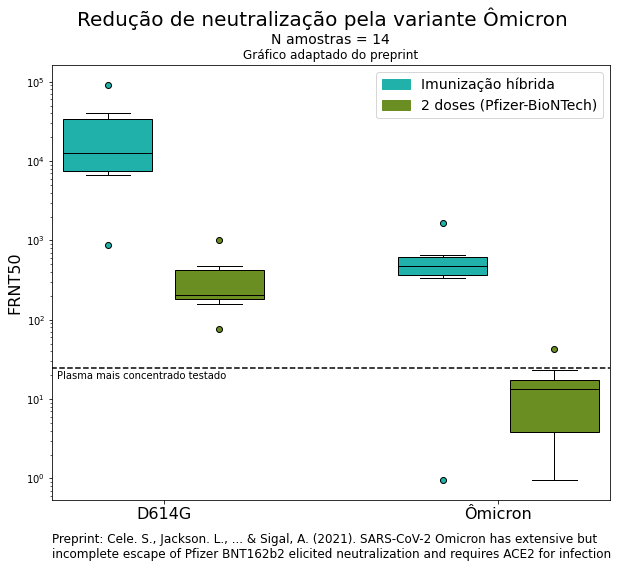

In [166]:
fig = plt.figure(figsize=(10,8))

samples = [df.loc[df['Type'] == 'Vax + Infec']['D614G'],
           df.loc[df['Type'] == 'BNT162b2']['D614G'],
           df.loc[df['Type'] == 'Vax + Infec']['Omicron'],
           df.loc[df['Type'] == 'BNT162b2']['Omicron']]

position = [-0.25,0.25,1.25,1.75]

colors = ['lightseagreen','olivedrab',
          'lightseagreen','olivedrab']

label = ['Imunização híbrida', '2 doses (Pfizer-BioNTech)']

for i in range(len(samples)):
  if i < 2:
    bp1 = plt.boxplot(samples[i], patch_artist = True, medianprops=dict(color='black'),
            whis = (2.5, 97.5), positions = [position[i]], widths = [0.4],
            boxprops=dict(facecolor=colors[i]), flierprops=dict(marker='o',
                                                                markerfacecolor=colors[i],
                                                                markeredgecolor='k'))
    plt.fill_between([-3,-2], 0, 1, label = label[i], color = colors[i])
  else:
    bp1 = plt.boxplot(samples[i], patch_artist = True, medianprops=dict(color='black'),
            whis = (2.5, 97.5), positions = [position[i]], widths = [0.4],
            boxprops=dict(facecolor=colors[i]), flierprops=dict(marker='o',
                                                                markerfacecolor=colors[i],
                                                                markeredgecolor='k'))

plt.xticks([0, 1.5], labels = ['D614G', 'Ômicron'], fontsize = 16)
plt.yscale('log')
plt.ylabel('FRNT50', fontsize = 16)
plt.hlines(th, -1, 2, linestyles='dashed')
plt.xlim(-0.5, 2)
plt.suptitle('Redução de neutralização pela variante Ômicron', fontsize = 20)
plt.legend(loc='upper right', fontsize = 14)
plt.text(0.48, 3e5, 'N amostras = 14', fontsize = 14)
plt.title('Gráfico adaptado do preprint')
plt.text(-0.48, 18, 'Plasma mais concentrado testado')
plt.text(-0.5, 0.1, 'Preprint: Cele. S., Jackson. L., ... & Sigal, A. (2021). SARS-CoV-2 Omicron has extensive but'
'\n'
'incomplete escape of Pfizer BNT162b2 elicited neutralization and requires ACE2 for infection', fontsize = 12)
fig.patch.set_alpha(1)
for ax in fig.axes:
    ax.patch.set_alpha(1)